In [123]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#load files
# Study data files
crop_production_path = "crop_production_clean.csv"
temp_file_path = "temperature_clean.csv"

#read the temperature and crop data, encoding='ISO-8859-1'
crop_pro_results = pd.read_csv(crop_production_path,encoding="ISO-8859-1")
temp_read_results = pd.read_csv(temp_file_path,encoding="ISO-8859-1")
crop_pro_results =crop_pro_results[ ["Area","Item"] + list(crop_pro_results.loc[:,"Y1961":"Y2013"]) ]

crop_pro_results.head()


,Area,Item,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Rice (Milled Equivalent),183,183,182,220,220,195,231,235,...,419,445,546,455,490,415,442,476,425,422
1,Afghanistan,Barley and products,237,237,237,238,238,237,225,227,...,185,43,44,48,62,55,60,72,78,89
2,Afghanistan,Maize and products,403,403,410,415,415,413,454,448,...,231,67,82,67,69,71,82,73,77,76
3,Afghanistan,Potatoes and products,111,97,103,110,113,117,128,130,...,276,294,294,260,242,250,192,169,196,230
4,Afghanistan,Sugar (Raw Equivalent),45,41,43,52,55,58,62,65,...,124,152,169,192,217,231,240,240,250,255


In [3]:
#rename columns
renamed_crop_column=[]
for col in crop_pro_results.columns:
    renamed_crop_column.append(f'{col}_crop')
crop_pro_results.columns =renamed_crop_column
crop_pro_results.head()

,Area_crop,Item_crop,Y1961_crop,Y1962_crop,Y1963_crop,Y1964_crop,Y1965_crop,Y1966_crop,Y1967_crop,Y1968_crop,...,Y2004_crop,Y2005_crop,Y2006_crop,Y2007_crop,Y2008_crop,Y2009_crop,Y2010_crop,Y2011_crop,Y2012_crop,Y2013_crop
0,Afghanistan,Rice (Milled Equivalent),183,183,182,220,220,195,231,235,...,419,445,546,455,490,415,442,476,425,422
1,Afghanistan,Barley and products,237,237,237,238,238,237,225,227,...,185,43,44,48,62,55,60,72,78,89
2,Afghanistan,Maize and products,403,403,410,415,415,413,454,448,...,231,67,82,67,69,71,82,73,77,76
3,Afghanistan,Potatoes and products,111,97,103,110,113,117,128,130,...,276,294,294,260,242,250,192,169,196,230
4,Afghanistan,Sugar (Raw Equivalent),45,41,43,52,55,58,62,65,...,124,152,169,192,217,231,240,240,250,255


In [50]:
# Temperature data set
yearly_temp_avg =temp_read_results[["AverageTemperature","year","Country"]]
yearly_temp_avg_df=pd.DataFrame(yearly_temp_avg).set_index("year")
yearly_temp_avg_df = yearly_temp_avg_df.reset_index()#.groupby("Country","year").AverageTemperature.mean()
yearly_temp_avg_grouped =pd.DataFrame(yearly_temp_avg_df).groupby(["Country","year"]).AverageTemperature.mean()
yearly_temp_avg_grouped=yearly_temp_avg_grouped.unstack()
# Rename the columns for temp file
renamed_column =[]
for column in yearly_temp_avg_grouped.columns:
    renamed_column.append(f'{column}')
yearly_temp_avg_grouped.columns =renamed_column
print(yearly_temp_avg_grouped)

                     1961       1962       1963       1964       1965  \
Country                                                                 
Afghanistan     14.064917  13.768667  15.033417  13.084917  14.101833   
Africa          24.028500  24.194500  24.266667  23.993750  23.967583   
Albania         13.316750  13.068750  13.085833  12.515333  12.378417   
Algeria         23.390333  23.182417  23.317833  23.147500  22.973750   
American Samoa  26.617167  26.627667  26.857667  26.595667  26.381250   
...                   ...        ...        ...        ...        ...   
Western Sahara  23.084000  22.717167  22.479250  22.786667  22.252750   
Yemen           26.331167  26.197333  26.268667  26.099083  25.967667   
Zambia          21.541167  21.266667  21.014583  21.129500  21.042667   
Zimbabwe        21.408500  21.432583  20.756500  21.080583  20.992333   
Ãland           6.833083   4.790500   4.887750   5.586417   4.880250   

                     1966       1967       1968   

In [7]:
#Merge the two data sets
combined_crop_temp_df= crop_pro_results.merge(yearly_temp_avg_grouped, how ="outer",left_on='Area_crop', right_on="Country", suffixes=(False, False))
combined_crop_temp_df.head()


,Area_crop,Item_crop,Y1961_crop,Y1962_crop,Y1963_crop,Y1964_crop,Y1965_crop,Y1966_crop,Y1967_crop,Y1968_crop,...,2002Temp,2003Temp,2004Temp,2005Temp,2006Temp,2007Temp,2008Temp,2009Temp,2010Temp,2011Temp
0,Afghanistan,Rice (Milled Equivalent),183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,...,15.537667,14.916,15.770917,14.98,15.595583,15.106167,15.2165,15.25775,15.828667,15.518
1,Afghanistan,Barley and products,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,...,15.537667,14.916,15.770917,14.98,15.595583,15.106167,15.2165,15.25775,15.828667,15.518
2,Afghanistan,Maize and products,403.0,403.0,410.0,415.0,415.0,413.0,454.0,448.0,...,15.537667,14.916,15.770917,14.98,15.595583,15.106167,15.2165,15.25775,15.828667,15.518
3,Afghanistan,Potatoes and products,111.0,97.0,103.0,110.0,113.0,117.0,128.0,130.0,...,15.537667,14.916,15.770917,14.98,15.595583,15.106167,15.2165,15.25775,15.828667,15.518
4,Afghanistan,Sugar (Raw Equivalent),45.0,41.0,43.0,52.0,55.0,58.0,62.0,65.0,...,15.537667,14.916,15.770917,14.98,15.595583,15.106167,15.2165,15.25775,15.828667,15.518


In [49]:
#find sum average of all countries and plot line graph

yearly_temp_avg_grouped["Results"]= yearly_temp_avg_grouped.apply(lambda row: row['1961TEmp':'2011Temp'].mean(),axis = 1)
yearly_temp_avg_grouped.head()

,1961Temp,1962Temp,1963Temp,1964Temp,1965Temp,1966Temp,1967Temp,1968Temp,1969Temp,1970Temp,...,2003Temp,2004Temp,2005Temp,2006Temp,2007Temp,2008Temp,2009Temp,2010Temp,2011Temp,Results
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,14.064917,13.768667,15.033417,13.084917,14.101833,14.343000,13.663250,13.762333,13.805083,14.783083,...,14.916000,15.770917,14.980000,15.595583,15.106167,15.216500,15.257750,15.828667,15.518000,14.593467
Africa,24.028500,24.194500,24.266667,23.993750,23.967583,24.301833,23.931000,24.011750,24.554833,24.321583,...,25.025583,24.895917,25.156167,24.818917,24.851500,24.754667,25.026500,25.472500,24.786500,24.480167
Albania,13.316750,13.068750,13.085833,12.515333,12.378417,13.204583,12.621750,12.869583,12.802917,12.839667,...,13.626583,13.258167,12.747083,12.976917,13.890500,13.955167,13.844250,13.775417,13.443250,13.014575
Algeria,23.390333,23.182417,23.317833,23.147500,22.973750,23.301333,22.861667,23.185917,23.458250,23.322833,...,24.393667,23.916000,24.222583,24.200833,24.065333,23.950250,24.154333,25.215667,24.144167,23.550345
American Samoa,26.617167,26.627667,26.857667,26.595667,26.381250,26.822167,26.420417,26.480833,26.936583,26.760667,...,27.264833,27.281167,27.373500,27.081250,27.452417,26.995083,27.034250,27.453417,27.009500,26.948644


In [187]:
yearly_temp_avg_grouped.drop_duplicates()
years_avg=yearly_temp_avg_grouped.describe(include='all').loc['mean']
years_avg



1961    18.923565
1962    18.693847
1963    18.675248
1964    18.581275
1965    18.517541
1966    18.866288
1967    18.634187
1968    18.605819
1969    18.771526
1970    18.794121
1971    18.588207
1972    18.665612
1973    18.873293
1974    18.631447
1975    18.746662
1976    18.482197
1977    18.922261
1978    18.729517
1979    18.909544
1980    18.853321
1981    18.916136
1982    18.852169
1983    19.094044
1984    18.764961
1985    18.699131
1986    18.801152
1987    19.051045
1988    19.111679
1989    19.056767
1990    19.317686
1991    19.011360
1992    18.972007
1993    18.930800
1994    19.251702
1995    19.267070
1996    18.958375
1997    19.250351
1998    19.596783
1999    19.392100
2000    19.349202
2001    19.425303
2002    19.565523
2003    19.525087
2004    19.422092
2005    19.499590
2006    19.539135
2007    19.610394
2008    19.423962
2009    19.546385
2010    19.629806
2011    19.456040
Name: mean, dtype: float64

In [185]:
years_avg=yearly_temp_avg_grouped.describe()
years_avg

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,...,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,18.923565,18.693847,18.675248,18.581275,18.517541,18.866288,18.634187,18.605819,18.771526,18.794121,...,19.565523,19.525087,19.422092,19.499590,19.539135,19.610394,19.423962,19.546385,19.629806,19.456040
std,8.981866,9.227378,9.325542,9.223380,9.244999,9.236260,9.067530,9.185960,9.504992,9.306184,...,9.022744,9.094895,9.072579,9.124147,8.968938,8.918831,8.888759,9.070230,9.273418,8.950056
min,-18.990333,-17.427833,-17.725750,-18.574417,-17.530583,-18.842417,-18.583500,-18.818917,-18.392083,-18.738167,...,-16.820417,-16.256250,-17.301167,-16.151250,-17.114333,-17.074167,-17.389917,-17.316417,-15.546333,-17.174333
25%,11.305104,10.576979,10.373083,10.446854,10.177979,11.257042,10.689854,10.822354,10.451125,10.963708,...,11.790208,11.617562,11.247833,11.265667,11.436313,12.040125,11.802208,11.732583,11.372021,11.756979
50%,22.959750,22.866125,22.932292,22.798083,22.738667,23.030833,22.685292,22.620417,23.045542,23.015542,...,23.608042,23.456125,23.436833,23.571042,23.520833,23.578000,23.478208,23.380458,23.895417,23.465917
75%,26.278396,26.264792,26.294563,26.224875,26.215250,26.433375,26.095000,26.126333,26.650167,26.412521,...,26.935667,27.020708,26.861042,27.080833,27.009646,26.959646,26.669542,26.977750,27.173896,26.768333
max,28.869500,28.718333,29.097583,28.643833,28.422333,28.819500,28.555417,28.543583,29.155917,28.989250,...,29.531583,29.757833,29.540917,29.808583,29.777417,29.786333,29.339250,29.896750,30.127083,29.844333


In [192]:
world_avg_df = pd.DataFrame(years_avg)
world_avg_df.head(10)

#def cel_to_fah(x):
    #x = (x*1.8)+32
    #return x
#world_avg_df ['mean']= world_avg_df['std'].apply(cel_to_fah)

world_avg_df.reset_index()
world_avg_df.index.names= ['year']

world_avg_df.reset_index(inplace=True)
world_avg_df.columns= ['Year','std']
world_avg_df.head()
#world_avg_sd=np.std(world_avg_df)
#world_avg_sd



#world_avg_df.set_index( ,drop=True, append=False, inplace=False, verify_integrity=False)

,Year,std
0,1961,18.923565
1,1962,18.693847
2,1963,18.675248
3,1964,18.581275
4,1965,18.517541


In [151]:
world_avg_df.columns

Index(['Year', 'Temp F'], dtype='object')

mean    0.621363
dtype: float64

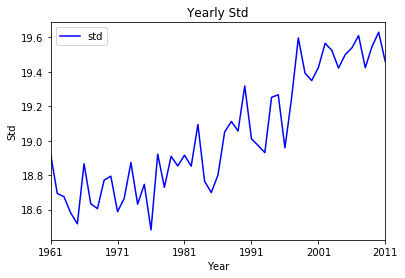

In [198]:
world_avg_df.plot(kind='line', x='Year',y='std',color='blue')
plt.title('Yearly Std')
plt.ylabel('Std')
plt.xlabel('Year')                  
plt.savefig("std.png")

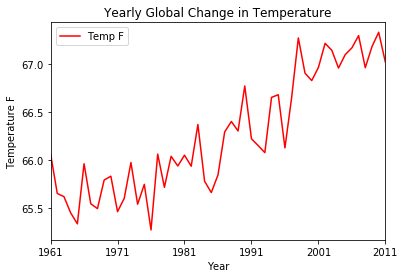

In [152]:
world_avg_df.plot(kind='line',x='Year',y='Temp F',color='red')
plt.title('Yearly Global Change in Temperature')
plt.ylabel('Temperature F')
plt.savefig("figure.png")